# 8. 다섯 가지 정규화 확장


## 실행하기

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 구현 파일 실행시키기

In [2]:
%run 'gdrive/MyDrive/ALZZA/ch08/8. 정규화 확장 클래스.ipynb'
%run 'gdrive/MyDrive/ALZZA/ch05/5. 꽃 이미지 분류 데이터셋 클래스.ipynb'
%run 'gdrive/MyDrive/ALZZA/ch06/6. 오피스31 데이터셋 클래스.ipynb'

### 실험용 데이터셋 객체 생성

In [3]:
fd = FlowersDataset([96, 96], [96, 96, 3])
od = Office31Dataset([96, 96], [96, 96, 3])

### 베이스라인 모델의 파라미터 분포 확인

Model flowers_model_1 train started:
    Epoch 2: cost=1.568, accuracy=0.311/0.360 (19/19 secs)
    Epoch 4: cost=1.424, accuracy=0.372/0.380 (19/38 secs)
    Epoch 6: cost=1.357, accuracy=0.419/0.380 (19/57 secs)
    Epoch 8: cost=1.314, accuracy=0.431/0.330 (20/77 secs)
    Epoch 10: cost=1.298, accuracy=0.424/0.410 (19/96 secs)
Model flowers_model_1 train ended in 96 secs:
Model flowers_model_1 test report: accuracy = 0.419, (1 secs)

Model flowers_model_1 Visualization


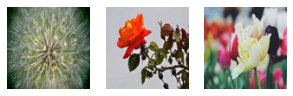

추정확률분포 [32,42, 0, 9, 7, 9] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [ 9,25, 0,10,37,19] => 추정 sunflower : 정답 rose => X
추정확률분포 [16,15, 0,30, 8,30] => 추정 tulip : 정답 tulip => O


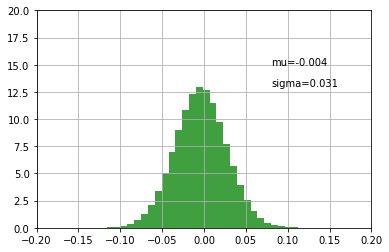

Near 0 parameters =  0.0%(205/829800)


In [4]:
fm1 = CnnRegModel('flowers_model_1', fd, [30, 10])
fm1.exec_all(epoch_count=10, report=2, show_params=True)

### L2 손실의 효과와 파라미터 분포의 변화 확인

Model flowers_model_2 train ended in 748 secs:
Model flowers_model_2 test report: accuracy = 0.233, (0 secs)



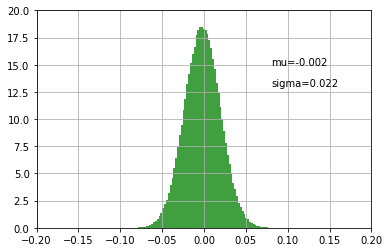

Near 0 parameters =  0.0%(328/829800)


In [5]:
fm2 = CnnRegModel('flowers_model_2', fd, [30,10], l2_decay=0.1)
fm2.exec_all(epoch_count=10, show_cnt=0, show_params=True)

### L1 손실의 효과와 파라미터 분포의 변화 확인

Model flowers_model_3 train ended in 777 secs:
Model flowers_model_3 test report: accuracy = 0.275, (0 secs)



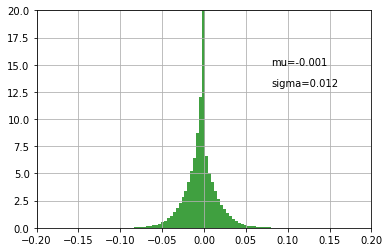

Near 0 parameters = 65.1%(540471/829800)


In [6]:
fm3 = CnnRegModel('flowers_model_3', fd, [30,10], l1_decay=0.01)
fm3.exec_all(epoch_count=10, show_cnt=0, show_params=True)

### 베이스라인 합성곱 신경망의 성능 확인

Model flowers_cnn_1 train started:
    Epoch 2: cost=1.150, accuracy=0.530/0.510 (170/170 secs)
    Epoch 4: cost=0.952, accuracy=0.635/0.660 (168/338 secs)
    Epoch 6: cost=0.812, accuracy=0.703/0.640 (170/508 secs)
    Epoch 8: cost=0.717, accuracy=0.732/0.580 (170/678 secs)
    Epoch 10: cost=0.632, accuracy=0.763/0.660 (170/848 secs)
Model flowers_cnn_1 train ended in 848 secs:
Model flowers_cnn_1 test report: accuracy = 0.626, (4 secs)

Model flowers_cnn_1 Visualization


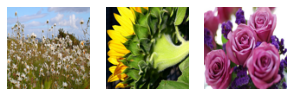

추정확률분포 [42, 7, 0, 6, 9,36] => 추정 daisy : 정답 daisy => O
추정확률분포 [ 6, 2, 0, 1,51,40] => 추정 sunflower : 정답 sunflower => O
추정확률분포 [ 4, 0, 0,68, 2,25] => 추정 rose : 정답 rose => O


In [7]:
cnn1 = [['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
fcnn1 = CnnRegModel('flowers_cnn_1', fd, cnn1)
fcnn1.exec_all(epoch_count=10, report=2)

### 드롭아웃 기법의 동작과 효과 확인

In [8]:
cnn2 = [['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['dropout', {'keep_prob':0.6}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['dropout', {'keep_prob':0.6}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}],
        ['dropout', {'keep_prob':0.6}]]
fcnn2 = CnnRegModel('flowers_cnn_2', fd, cnn2)
fcnn2.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_2 train started:
    Epoch 2: cost=1.221, accuracy=0.512/0.400 (179/179 secs)
    Epoch 4: cost=1.049, accuracy=0.592/0.500 (178/357 secs)
    Epoch 6: cost=0.967, accuracy=0.625/0.470 (177/534 secs)
    Epoch 8: cost=0.928, accuracy=0.650/0.520 (178/712 secs)
    Epoch 10: cost=0.894, accuracy=0.658/0.520 (177/889 secs)
Model flowers_cnn_2 train ended in 889 secs:
Model flowers_cnn_2 test report: accuracy = 0.486, (4 secs)



### 잡음 주입 기법의 동작과 효과 확인

In [9]:
noise_std = 0.01
cnn3 = [['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
fcnn3 = CnnRegModel('flowers_cnn_3', fd, cnn3)
fcnn3.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_3 train started:
    Epoch 2: cost=1.233, accuracy=0.495/0.500 (187/187 secs)
    Epoch 4: cost=0.936, accuracy=0.630/0.630 (189/376 secs)
    Epoch 6: cost=0.812, accuracy=0.692/0.720 (188/564 secs)
    Epoch 8: cost=0.734, accuracy=0.726/0.660 (189/753 secs)
    Epoch 10: cost=0.650, accuracy=0.758/0.730 (186/939 secs)
Model flowers_cnn_3 train ended in 939 secs:
Model flowers_cnn_3 test report: accuracy = 0.630, (4 secs)



### 배치 정규화 기법의 동작과 효과 확인

In [10]:
cnn4 = [['batch_normal'],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['batch_normal'],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['batch_normal'],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
fcnn4 = CnnRegModel('flowers_cnn_4', fd, cnn4)
fcnn4.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_4 train started:
    Epoch 2: cost=1.055, accuracy=0.597/0.360 (191/191 secs)
    Epoch 4: cost=0.885, accuracy=0.665/0.290 (191/382 secs)
    Epoch 6: cost=0.799, accuracy=0.694/0.500 (189/571 secs)
    Epoch 8: cost=0.711, accuracy=0.740/0.440 (188/759 secs)
    Epoch 10: cost=0.634, accuracy=0.774/0.550 (188/947 secs)
Model flowers_cnn_4 train ended in 947 secs:
Model flowers_cnn_4 test report: accuracy = 0.531, (4 secs)



### 오피스31 문제에 대한 정규화 기법의 효과 확인

In [11]:
ocnn1 = CnnRegModel('office31_cnn_1', od, cnn1)
ocnn2 = CnnRegModel('office31_cnn_2', od, cnn2)
ocnn3 = CnnRegModel('office31_cnn_3', od, cnn3)
ocnn4 = CnnRegModel('office31_cnn_4', od, cnn4)

ocnn1.exec_all(epoch_count=10, show_cnt=0)
ocnn2.exec_all(epoch_count=10, show_cnt=0)
ocnn3.exec_all(epoch_count=10, show_cnt=0)
ocnn4.exec_all(epoch_count=10, show_cnt=0)

Model office31_cnn_1 train ended in 815 secs:
Model office31_cnn_1 test report: accuracy = 0.912+0.501, (3 secs)

Model office31_cnn_2 train ended in 845 secs:
Model office31_cnn_2 test report: accuracy = 0.314+0.464, (3 secs)

Model office31_cnn_3 train ended in 889 secs:
Model office31_cnn_3 test report: accuracy = 0.882+0.509, (3 secs)

Model office31_cnn_4 train ended in 902 secs:
Model office31_cnn_4 test report: accuracy = 0.926+0.477, (4 secs)

